# Tourism Report Campania 2011 by Taylor Higgins | Data Lab with Professor Vignole 2022 

### A survey on travel habits throughout Italy was taken in the beginning of 2011 with 823 participants. In this section we’ll focus primarily on Campania data. 

Part I: Introduction to Campania

Campania is a region in Southwestern Italy known for its gorgeous coastline, and ancient archeological sites. The area of Campania is 13,590 square km, and had a population of 5.802 million in 2019 according to Eurostat. The city of Naples is the region’s capital, world-renowned for its folded pizza and other street food. Other important sites in the region include the somma-stratovolcano, Mount Vesuvius, which is visible from the City of Naples, and is well known for erupting and destroying the town of Pompeii in AD 79. This eruption petrified and preserved the town, creating a very important historical landmark of Pompeii, Herculaneum, Oplontis and Stabiae. It is still regarded as one of the most dangerous volcanoes in the world since so many people live within its eruption zone. Other important cities in the area include Positano, Amalif and Ravello, three towns in the Amalfi Coast, iconic for being positioned between cliffs and the sea. 


In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib as plt
import scipy
from scipy import stats
from scipy.stats import describe
import seaborn as sns

In [2]:
df = pd.read_csv('campania.csv')

In [3]:
df.rename({"Anno":"year", "Mese": "month", "TIPFAM":"family_type", "NC": "number_members", "Sesso1": "gender", "Eta4_1": "age", "Statociv1": "civil_status", "Titstu1": "education", "Conprof1": "employment", "Occupa_abita": "housing", "Altreabit": "second_home", "Vacanze": "holiday_rec", "Estero": "holiday_rec_abroad", "Italia": "holiday_rec_domestic", "C_9901":"abroad_all_inc", "C_9902": "abroad_hotel_meals", "C_9903": "abroad_hotel", "C_9911": "domestic_all_inc", "C_9912": "domestic_hotel_meals", "C_9913":"domestic_hotel", "Trasp":"transportation_exp", "ALIM_BEV_TAB":"food_exp", "SPESATOT":"all_exp"}, axis="columns", inplace=True)


In [4]:
df.drop(['aut','est', 'pri', 'centro', 'nord', 'Periodo'], axis=1, inplace=True)

In [5]:
#create a new dataframe for quant and qual variables
quant_labels = ['number_members', 'abroad_all_inc', 'abroad_hotel_meals', 'abroad_hotel', 'holiday_rec', 'holiday_rec_abroad', 'holiday_rec_domestic', 'domestic_all_inc', 'domestic_hotel_meals', 'domestic_hotel', 'trasp', 'all_exp', 'food_exp']
df_quant = df.loc[:, quant_labels]
qual_labels = ['id', 'year', 'month', 'gender','family_type', 'age', 'civil_status', 'education', 'employment', 'housing', 'second_home', 'holiday_rec', 'holiday_rec_abroad', 'holiday_rec_domestic']
df_qual = df.loc[:, qual_labels].astype("category")

## Quantitative Summary Stats
By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.
75 percentile means only 25% of answers are above

In [6]:
df_quant.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_members,823.0,2.800729,1.373772,1.00,2.000,3.00,4.000,9.00
abroad_all_inc,823.0,0.607533,17.428904,0.00,0.000,0.00,0.000,500.00
abroad_hotel_meals,823.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
abroad_hotel,823.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
holiday_rec,823.0,1.978129,0.146352,1.00,2.000,2.00,2.000,2.00
holiday_rec_abroad,18.0,1.944444,0.235702,1.00,2.000,2.00,2.000,2.00
holiday_rec_domestic,18.0,1.055556,0.235702,1.00,1.000,1.00,1.000,2.00
domestic_all_inc,823.0,0.668287,12.189324,0.00,0.000,0.00,0.000,300.00
domestic_hotel_meals,823.0,12.272175,130.066664,0.00,0.000,0.00,0.000,1800.00
domestic_hotel,823.0,7.557716,98.679795,0.00,0.000,0.00,0.000,2200.00


## Qualitative Summary Stats
The top is the most common value
The freq is the most common value’s frequency

In [7]:
df_qual.describe().transpose()

,count,unique,top,freq
id,823.0,24.0,2011062.0,43.0
year,823.0,1.0,2011.0,823.0
month,823.0,12.0,1.0,81.0
gender,820.0,2.0,1.0,592.0
family_type,823.0,11.0,8.0,171.0
age,823.0,3.0,3.0,498.0
civil_status,812.0,4.0,2.0,560.0
education,823.0,8.0,6.0,266.0
employment,823.0,8.0,1.0,397.0
housing,823.0,4.0,2.0,499.0


## Part II: Survey Participants

Gender: The majority of participants identified as male. 72% male, 27% female
Age: 92% of participants were 35 or older. 60% being between 35 and 64 and only 6% being below 35. 
Family Composition: Roughly 62% or more than half of participants had children, either in a couple (42%) or single or otherwise. And roughly 36% had no children, either in a couple or single. 
Number of Family Members: The average family size was approximately 3. 
Civil Status: The majority of participants were married, 69%. 
Education Level: Approximately 30% had graduated high school (or an even higher degree). While 32% had only primary education, and 25% had less than primary education. 
Employment Status: 48% were employed, while 30% were retired. 78% were either employed or retired. 
Housing Status: 60% were homeowners  
Second Home Status: 98% of participants had access to a second home. 


## Cross Tabs of Qualitative Data 

In [9]:
tab = (pd.crosstab(index=df['holiday_rec_domestic'], columns='frequency percent')) 
gender_freq_ratio = tab/tab.sum()
family_type_freq_ratio = tab/tab.sum()
age_freq_ratio = tab/tab.sum()
civil_status_freq_ratio = tab/tab.sum()
education_status_freq_ratio = tab/tab.sum()
employment_status_freq_ratio = tab/tab.sum()
housing_status_freq_ratio = tab/tab.sum()
second_home_status_freq_ratio = tab/tab.sum()
holiday_rec_status_freq_ratio = tab/tab.sum()
holiday_rec_abroad_freq_ratio = tab/tab.sum()
holiday_rec_domestic_freq_ratio = tab/tab.sum()
print(holiday_rec_domestic_freq_ratio)

col_0                 frequency percent
holiday_rec_domestic                   
1.0                            0.944444
2.0                            0.055556


## Part III: Holiday Behavior and Spending Habits 
	
In the last month, 97% of participants hadn’t made vacation expenses. Of the 2% who did make holiday expenses in the last month, only 6% were holidays abroad, while 94% were domestic holidays in Italy. Responses on expenses were rather spread out. For the abroad holidays, the most any participant spent was 500 euros and it was for an all inclusive resort. The standard deviation was 17.42. Meanwhile, for domestic holidays, all inclusive resort max spending was 300 euros with a standard deviation of 12.18, the mode and median for both were 0 indicating most participants didn’t spend anything on all inclusive resorts either abroad or domestically.
Total expenditures a month had an even wider distribution. 
Total spending on transportation a month had a standard deviation of 311.95 with 75% of participants spending less than 300 euro, but the max being spent by any respondent was close to 6400 euro. 

Total spending on food a month had a standard deviation of 321.37 and 75% of respondents spent less than 700 euros, while the max spent was 2002. 

All expenses a month had a standard deviation of 1134.55. And 75% of participants spent less than 2500 euro, whereas the max spent was 7821 euro. 


## Pivot Tables Analyzing Average Monthly Expenses

In [10]:
data = df
pivot_age_edu_spend = pd.pivot_table(data=data, index=["education"],columns=["age"], values='all_exp', aggfunc='mean')
print(pivot_age_edu_spend)

age                  2            3            4
education                                       
1          2046.520000  3238.435556  2577.350000
2          2201.030000  3082.809091  2778.080000
3          1471.350000  2737.927000          NaN
4          1798.945263  2612.766197  2117.471250
5          2406.623333  2132.919355  1732.598571
6          1404.086364  1978.858434  1730.102174
7          1305.880000  1520.480147  1396.325620
8                  NaN  1138.382857  1054.104091


In [11]:
data = df
pivot_age_emp_spend = pd.pivot_table(data=data, index=["employment"],columns=["age"], values='all_exp', aggfunc='mean')
print(pivot_age_emp_spend)

age                   2            3            4
employment                                       
1           1807.654651  2423.258725  2615.513333
2           1132.628333  1713.270333          NaN
3            898.060000  1227.365000          NaN
4           1812.630000  1609.062222  1181.631765
5           1113.423333          NaN          NaN
6                   NaN  1854.514000  1510.092000
7                   NaN  1870.712600  1550.797921
8                   NaN  1648.325789  1252.956667


In [12]:
data = df
pivot_civil_emp_spend = pd.pivot_table(data=data, index=["employment"],columns=["civil_status"], values='all_exp', aggfunc='mean')
print(pivot_civil_emp_spend)

civil_status          1.0          2.0          3.0          4.0
employment                                                      
1             1804.155652  2480.322690  1811.937600  3071.357143
2              815.070000  1628.579412  2007.110000          NaN
3             1146.640000   935.810000          NaN  1259.545000
4             1046.640000  1842.245455  1754.185000  1178.735714
5             1113.423333          NaN          NaN          NaN
6              708.935000  2454.462857   702.805000  1118.640000
7             1259.558182  1756.187485  1174.340000  1338.673881
8             1011.426000  2044.269167  1231.603333  1217.355500


In [13]:
data = df
pivot_fam_civ_spend = pd.pivot_table(data=data, index=["family_type"],columns=["civil_status"], values='all_exp', aggfunc='mean')
print(pivot_fam_civ_spend)

civil_status          1.0          2.0          3.0          4.0
family_type                                                     
1             1855.862105  1324.496667  1009.040000          NaN
2             1487.187667  1282.351875  1639.707500  1032.907857
3              858.608000          NaN  1095.076667   978.650984
4                     NaN  1646.564000          NaN          NaN
5             1901.935000  1896.896042          NaN          NaN
6                     NaN  1490.705823          NaN          NaN
7             2284.285000  2159.322640  1588.425000  2294.865000
8             2186.590000  2627.507939  2729.515000  1565.480000
9                     NaN  2434.550926          NaN          NaN
10            1354.262500  2125.613462  1498.286000  1807.082857
11            1672.015714  2174.972308  2931.145000  1899.417500


In [18]:
data = df
pivot_fam_housing_spend = pd.pivot_table(data=data, index=["family_type"],columns=["housing"], values='all_exp', aggfunc='mean')
print(pivot_fam_housing_spend)
print(pivot_fam_housing_spend[1].sum())

housing                1            2            3            4
family_type                                                    
1            1327.117778  2071.951000  2549.285000  1240.885000
2             918.371000  1720.330571  1751.465000  1500.633333
3             749.292632  1073.120204   886.115714   709.950000
4             999.440000  2033.640000          NaN  1603.500000
5            1187.064286  2232.182500  1536.145000  1866.925000
6            1204.413750  1565.387419          NaN  1340.520000
7            1753.053488  2449.971169  1425.030000  1686.199091
8            2215.328108  2855.112963  2010.110000  2195.357778
9            2200.273333  2587.318108  2325.710000  1751.497500
10           1324.572414  2146.430000  1682.155000  2068.317143
11           1364.297692  2440.535000  1734.155000  1481.600000
15243.22448098534


In [17]:
data = df
pivot_edu_housing_spend = pd.pivot_table(data=data, index=["education"],columns=["housing"], values='all_exp', aggfunc='mean')
print(pivot_edu_housing_spend)
print(pivot_edu_housing_spend.max())

housing              1            2         3            4
education                                                 
1          2104.890000  3064.674545       NaN          NaN
2          1675.400000  3196.501471  1321.565  2324.720000
3          3323.880000  2607.755000       NaN  2332.350000
4          2083.994889  2649.221575  2546.424  1874.300625
5          1312.062727  2293.960000  2531.155  3562.250000
6          1448.218111  2169.971275  1569.840  1881.717000
7          1224.417465  1601.244870  1172.898  1316.760000
8           936.931875  1155.112000   625.535  1151.306667
housing
1    3323.880000
2    3196.501471
3    2546.424000
4    3562.250000
dtype: float64


## Pivot Tables by Travel Spend

In [19]:
data = df
pivot_edu_housing_travle_domestic_spend = pd.pivot_table(data=data, index=["education"],columns=["housing"], values='domestic_all_inc', aggfunc='mean')
print(pivot_edu_housing_travle_domestic_spend)
print(pivot_edu_housing_travle_domestic_spend.max())

housing      1         2    3    4
education                         
1          0.0  0.000000  NaN  NaN
2          0.0  0.000000  0.0  0.0
3          0.0  0.000000  NaN  0.0
4          0.0  3.543307  0.0  0.0
5          0.0  0.000000  0.0  0.0
6          0.0  0.000000  0.0  0.0
7          0.0  0.869565  0.0  0.0
8          0.0  0.000000  0.0  0.0
housing
1    0.000000
2    3.543307
3    0.000000
4    0.000000
dtype: float64


In [20]:
data = df
pivot_edu_housing_travle_domestic_spend = pd.pivot_table(data=data, index=["education"],columns=["housing"], values='abroad_all_inc', aggfunc='mean')
print(pivot_edu_housing_travle_domestic_spend)
print(pivot_edu_housing_travle_domestic_spend.max())

housing      1         2    3    4
education                         
1          0.0  0.000000  NaN  NaN
2          0.0  0.000000  0.0  0.0
3          0.0  0.000000  NaN  0.0
4          0.0  0.000000  0.0  0.0
5          0.0  0.000000  0.0  0.0
6          0.0  3.355705  0.0  0.0
7          0.0  0.000000  0.0  0.0
8          0.0  0.000000  0.0  0.0
housing
1    0.000000
2    3.355705
3    0.000000
4    0.000000
dtype: float64


## Bar Plots

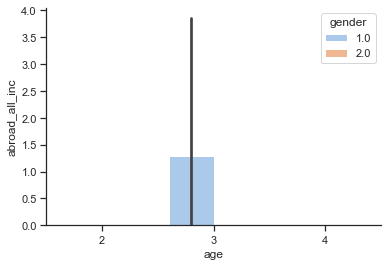

In [32]:
sns.set_theme(style="ticks") #darkgrid, whitegrid, dark, white, and ticks
sns.set_palette('pastel')
ex = sns.barplot(x=df['age'], y =df['abroad_all_inc'], hue=df['gender'])
sns.despine()

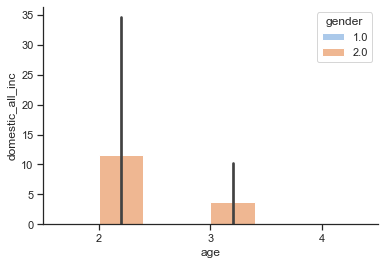

In [23]:
sns.set_theme(style="ticks") #darkgrid, whitegrid, dark, white, and ticks
sns.set_palette('pastel')
ex = sns.barplot(x=df['age'], y =df['domestic_all_inc'], hue=df['gender'])
sns.despine()

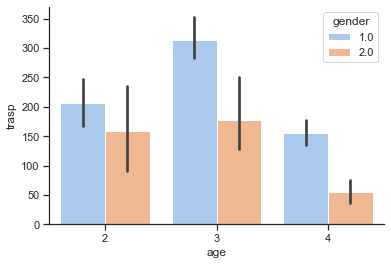

In [33]:
sns.set_theme(style="ticks") #darkgrid, whitegrid, dark, white, and ticks
sns.set_palette('pastel')
ex = sns.barplot(x=df['age'], y =df['trasp'], hue=df['gender'])
sns.despine()

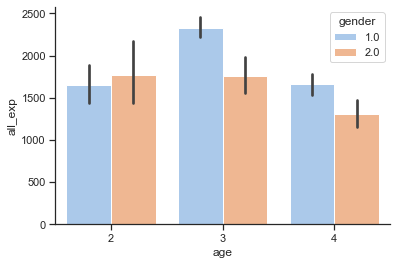

In [34]:
sns.set_theme(style="ticks") #darkgrid, whitegrid, dark, white, and ticks
sns.set_palette('pastel')
ex = sns.barplot(x=df['age'], y =df['all_exp'], hue=df['gender'])
sns.despine()

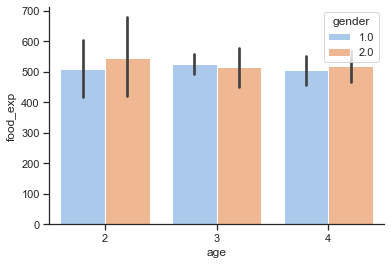

In [35]:
sns.set_theme(style="ticks") #darkgrid, whitegrid, dark, white, and ticks
sns.set_palette('pastel')
ex = sns.barplot(x=df['age'], y =df['food_exp'], hue=df['gender'])
sns.despine()

## Pie Charts for Binary Values

In [26]:
#transform gender data series
male = 0
female = 0
for index, value in df["gender"].items():
    if value == 1:
        male +=1
    elif value == 2:
        female +=1
gender = {"male":male, "female":female}
#second home
no_second_home = 0
yes_second_home = 0
for index, value in df["second_home"].items():
    if value == 1:
        no_second_home +=1
    elif value == 2:
        yes_second_home +=1
second_home = {"no_second_home":no_second_home, "yes_second_home":yes_second_home }

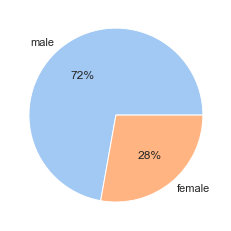

In [28]:
x = [int(gender["male"]), int(gender["female"])]
# print(type(x))
labels = ["male", "female"]
colors = sns.color_palette('pastel')[0:5]
plt.pyplot.pie(x, labels=labels, colors=colors, autopct='%.0f%%')
plt.pyplot.show()

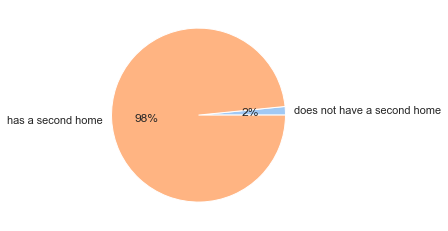

In [25]:
x = [int(second_home["no_second_home"]), int(second_home["yes_second_home"])]
# print(type(x))
labels = ["does not have a second home", "has a second home"]
colors = sns.color_palette('pastel')[0:5]
plt.pyplot.pie(x, labels=labels, colors=colors, autopct='%.0f%%')
plt.pyplot.show()

## Heat Maps

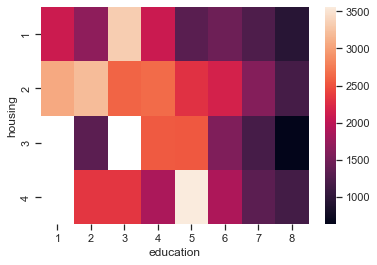

In [30]:
heatmap_qual = ['housing', 'education', 'all_exp']
df_heatmap = df.loc[:,heatmap_qual]
data_to_use = df_heatmap.pivot_table("all_exp","housing", "education")
ax = sns.heatmap(data_to_use)

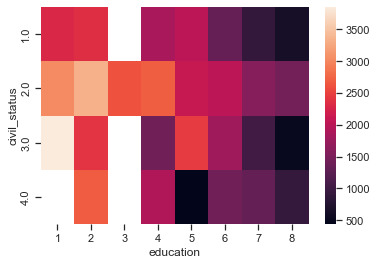

In [31]:
heatmap_qual = ['civil_status', 'education', 'all_exp']
df_heatmap = df.loc[:,heatmap_qual]
data_to_use = df_heatmap.pivot_table("all_exp","civil_status", "education")
ax = sns.heatmap(data_to_use)

In [21]:
heatmap_qual = ['employment', 'education', 'all_exp']
df_heatmap = df.loc[:,heatmap_qual]

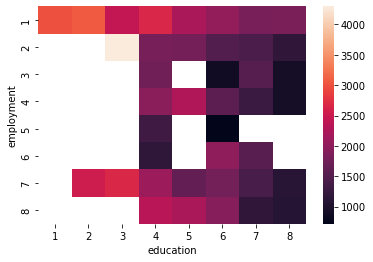

In [22]:
data_to_use = df_heatmap.pivot_table("all_exp","employment", "education")
ax = sns.heatmap(data_to_use)

## Part IV: Survey Analysis

	After running a couple analyses on the survey data, both cross tabulations and pivot tables, we can conclude a couple things about spending habits of participants.  

Of the survey participants, after cross-tabulating by education level and age, the highest spenders for monthly expenses, with an average of 3238 euros, were participants with a PhD, between the ages of 35 and 64. The second highest spenders were those with a masters between ages 35 and 64. Meanwhile the lowest spenders were participants ages 65 or older who had no formal education. On average they spent 1054 euro.

After cross-tabulating by age and employment level, we found that those aged 18-34 who were looking for first employment spent on average only 898 a month on expenses. 

Perhaps unsurprisingly, divorced or separated who identified as having a “other family typology” spent 2931, the highest spending group after cross-tabulating by civil status and family size. While singles aged 64 or older spent the least a month, on average 858 euro.This makes sense since separated families likely have to duplicate their spending, compared to those who are married or living together. While single retirees have less dependents and perhaps less income depending on their pension status so would spend more conservatively whether by choice or not. 

Those who were free-renting, and at least a Lower-Secondary education spent the most on average: 3562, when cross-tabulating participants by housing-status and education. The minimum being spent by those who socially-rented, and had no formal education: 625.535 on average a month. 

In conclusion, a DMO doing market research would likely want to target higher educated employed persons who own a home and are between the ages of 35 and 64, since they likely have the highest tolerance for higher spending on leisure activities evidenced on their monthly spending habits.. 
Furthermore we found that those participants who actually spent money on holidays in the last month were:
Domestically: Homeowners with Higher-Secondary education
Internationally: Homeowners with a Primary Education
A DMO would want to take that into consideration, when considering the demographic that is willing to travel and where. 
